In [1]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 10.1 MB/s eta 0:00:00


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import f1_score, accuracy_score
from sklearn.utils import shuffle
from imblearn.over_sampling import RandomOverSampler
import shap
import time
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Define oversampling function
def oversample(X, y):
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, y)
    return X_resampled, y_resampled

# Load dataset | uncomment according to dataset
# MEMS
# data = pd.read_csv("mems_dataset.csv")
# df_max_scaled = data
# data.pop('time')
# y = data.pop('label')

# IoT d7
data = pd.read_csv("device7_top_20_features.csv")
df_max_scaled = data
y = data.pop('label')


print('---------------------------------------------------------------------------------')
print('Normalizing database')
print('---------------------------------------------------------------------------------')
print('')


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the DataFrame
scaled_df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data = scaled_df

data = data.assign( label = y)

# Rename labels for better readability | uncomment according to dataset
# MEMS
# label_map = {1: 'Normal', 2: 'Near-failure', 3: 'Failure'}
# IoT d7
label_map = {1: 'benign', 2: 'gafgyt.combo', 3: 'gafgyt.junk', 4: 'gafgyt.scan', 5: 'gafgyt.tcp', 6: 'gafgyt.udp'}

data['label'] = data['label'].map(label_map)

# Separate features and labels | uncomment according to dataset
# MEMS
# X = data[['x', 'y', 'z']]
# IoT d7
X = data.drop(columns=['label'])

y = data['label']

# Define model parameters
max_depth = 5
n_estimators = 5
min_samples_split = 2

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, min_samples_split=min_samples_split, n_jobs=-1)

# Initialize SHAP explainer
explainer = None

# Model training
print('Training the model')
start = time.time()
rf_classifier.fit(X_train, y_train)
end = time.time()
print('ELAPSED TIME MODEL TRAINING:', (end - start) / 60, 'min')

# Model prediction
print('Predicting using the model')
start = time.time()
y_pred = rf_classifier.predict(X_test)
end = time.time()
print('ELAPSED TIME MODEL PREDICTION:', (end - start) / 60, 'min')

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
# MEMS
# roc_auc = roc_auc_score(label_binarize(y_test, classes=['Normal', 'Near-failure', 'Failure']),
#                         label_binarize(y_pred, classes=['Normal', 'Near-failure', 'Failure']), average='macro')
# IOT d7
roc_auc = roc_auc_score(label_binarize(y_test, classes=['benign','gafgyt.combo','gafgyt.junk','gafgyt.scan','gafgyt.tcp','gafgyt.udp']),
                        label_binarize(y_pred, classes=['benign','gafgyt.combo','gafgyt.junk','gafgyt.scan','gafgyt.tcp','gafgyt.udp']), average='macro')

print('Process Completed')

---------------------------------------------------------------------------------
Normalizing database
---------------------------------------------------------------------------------

Training the model
ELAPSED TIME MODEL TRAINING: 0.006105609734853109 min
Predicting using the model
ELAPSED TIME MODEL PREDICTION: 0.0004969120025634765 min
Process Completed


In [16]:
data

,HH_L3_covariance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,...,HH_L3_magnitude,HH_L3_radius,HH_L3_pcc,HpHp_L0.01_pcc,HH_L1_weight,HH_L1_mean,HH_L1_std,HH_L1_magnitude,HH_L1_radius,label
0,0.550675,0.000000,0.327361,0.000000e+00,0.203949,0.000000e+00,0.648563,0.388386,0.000000,3.571123e-01,...,0.212177,0.000000e+00,0.400765,0.331779,3.118369e-12,0.434629,0.000003,0.264356,5.832308e-12,benign
1,0.550675,0.000000,0.127751,0.000000e+00,0.118309,0.000000e+00,0.648563,0.388386,0.000000,1.393609e-01,...,0.123082,0.000000e+00,0.400765,0.332085,2.078913e-12,0.169611,0.000008,0.153350,3.981672e-11,benign
2,0.550675,0.000000,0.127751,0.000000e+00,0.118309,0.000000e+00,0.648563,0.388386,0.000000,1.393609e-01,...,0.123082,0.000000e+00,0.400765,0.332371,2.078913e-12,0.169611,0.000008,0.153350,4.168605e-11,benign
3,0.550675,0.000000,0.127751,0.000000e+00,0.118309,0.000000e+00,0.648563,0.388386,0.000000,1.393609e-01,...,0.123082,0.000000e+00,0.400765,0.356033,3.118369e-12,0.169611,0.000011,0.153350,7.346465e-11,benign
4,0.550675,0.000000,0.000000,0.000000e+00,0.013736,0.000000e+00,0.648563,0.388386,0.000000,6.938894e-18,...,0.014290,0.000000e+00,0.400765,0.331779,0.000000e+00,0.000000,0.000000,0.017805,0.000000e+00,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,0.550675,0.462547,0.012420,3.083252e-09,0.019493,1.352077e-17,0.648563,0.388386,0.598175,1.354898e-02,...,0.020279,4.591852e-18,0.400765,0.331779,7.973634e-01,0.016490,0.000008,0.025266,4.038354e-11,gafgyt.udp
119996,0.550675,0.602768,0.012420,6.307739e-05,0.019493,3.138984e-09,0.648563,0.388386,0.732736,1.354808e-02,...,0.020279,2.614086e-08,0.400765,0.331779,8.751446e-01,0.016485,0.000438,0.025264,1.171315e-07,gafgyt.udp
119997,0.550675,0.519479,0.012420,3.083252e-09,0.019493,7.558340e-18,0.648563,0.388386,0.607912,1.354898e-02,...,0.020279,3.586351e-17,0.400765,0.331779,5.627959e-01,0.016490,0.000002,0.025266,2.421237e-12,gafgyt.udp
119998,0.550675,0.573115,0.012420,1.134850e-07,0.019493,1.016060e-14,0.648563,0.388386,0.695719,1.354898e-02,...,0.020279,1.357032e-11,0.400765,0.331779,8.466198e-01,0.016490,0.000125,0.025266,9.567023e-09,gafgyt.udp


In [48]:
label = ['benign','gafgyt.combo','gafgyt.junk','gafgyt.scan','gafgyt.tcp','gafgyt.udp']

#Define function to test sample with the waterfall plot
def waterfall_explanator(sample):
    # datapoint to explain
    explainer = shap.TreeExplainer(rf_classifier)
    prediction = rf_classifier.predict(sample)[0] # Prediction of the sample | label[] didnt work cz my code is already predicting string
    #extract the index accordingly to prediction
    index = label.index(prediction)
    #generating shap values explainer
    sv = explainer(sample)
    bv = explainer.expected_value[index]
    exp = shap.Explanation(sv[:,:,index], sv.base_values[:,index], sample, feature_names=X_test.columns.tolist())
    #generating plot
    shap.waterfall_plot(exp[0],max_display=10,show= None)
    fig, ax = plt.subplots(figsize=(25, 15))
    plt.savefig('rf_shap_waterfall.png')
    plt.clf()

    feature_importance = pd.DataFrame({
        'row_id': sample.index.values.repeat(sample.shape[1]),
        'feature': sample.columns.to_list() * sample.shape[0],
        'feature_value': sample.values.flatten(),
        'base_value': bv,
        'shap_values': sv.values[:,:,index].flatten()

    })

    feature_importance['shap_values'] = abs(feature_importance['shap_values'])
    feature_importance.sort_values(by=['shap_values'], ascending=False,inplace=True)
    feature_importance.head()
    shap_val = feature_importance['shap_values'].tolist()
    feature_val = feature_importance['feature_value'].tolist()
    feature_name = feature_importance['feature'].tolist()

    return (prediction, shap_val,feature_val,feature_name)

In [29]:
X_test

,HH_L3_covariance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,HH_L3_std,HH_L3_magnitude,HH_L3_radius,HH_L3_pcc,HpHp_L0.01_pcc,HH_L1_weight,HH_L1_mean,HH_L1_std,HH_L1_magnitude,HH_L1_radius
71787,0.550675,9.897050e-05,0.033712,3.582415e-08,0.043439,3.416614e-14,0.648563,0.437621,3.369393e-04,3.677579e-02,1.082515e-05,0.045191,7.177427e-10,0.507444,0.331779,1.013792e-03,0.044683,2.724849e-03,0.056207,1.018180e-05
67218,0.550675,2.906591e-12,0.012420,0.000000e+00,0.007738,0.000000e+00,0.648563,0.388386,9.149583e-09,1.354898e-02,2.236376e-09,0.008050,3.673482e-18,0.400765,0.331779,1.805271e-05,0.016490,1.670191e-09,0.010030,1.700145e-18
54066,0.550675,5.710491e-01,0.012420,4.875050e-09,0.019493,1.912126e-17,0.648563,0.388386,6.867443e-01,1.354898e-02,2.236376e-09,0.020279,9.891152e-18,0.400765,0.331779,7.429855e-01,0.016490,7.737594e-06,0.025266,3.648933e-11
7168,0.550675,0.000000e+00,0.327361,0.000000e+00,0.203949,0.000000e+00,0.648563,0.388386,0.000000e+00,3.571123e-01,0.000000e+00,0.212177,0.000000e+00,0.400765,0.331779,3.118369e-12,0.434629,3.100162e-06,0.264356,5.851002e-12
29618,0.550675,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.648563,0.388386,0.000000e+00,6.938894e-18,0.000000e+00,0.000000,0.000000e+00,0.400765,0.331779,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40470,0.550675,5.203143e-01,0.012416,4.186974e-04,0.019491,1.383064e-07,0.648563,0.388386,6.599630e-01,1.354016e-02,5.920778e-04,0.020275,2.574813e-07,0.400765,0.331779,8.545876e-01,0.016479,6.382728e-04,0.025261,2.482942e-07
56954,0.550675,5.632775e-01,0.012419,2.036184e-04,0.019492,3.270964e-08,0.648563,0.388386,7.017025e-01,1.354531e-02,3.815780e-04,0.020278,1.069436e-07,0.400765,0.331779,8.504070e-01,0.016481,5.583469e-04,0.025262,1.900037e-07
48654,0.550675,4.994682e-01,0.012420,1.454367e-08,0.019493,1.673189e-16,0.648563,0.388386,6.374036e-01,1.354898e-02,1.513073e-06,0.020279,1.681544e-12,0.400765,0.331779,8.559940e-01,0.016490,1.092467e-04,0.025266,7.273952e-09
65345,0.550675,0.000000e+00,0.012420,0.000000e+00,0.007738,0.000000e+00,0.648563,0.388386,0.000000e+00,1.354898e-02,0.000000e+00,0.008050,0.000000e+00,0.400765,0.331779,0.000000e+00,0.016490,0.000000e+00,0.010030,0.000000e+00


In [30]:
sample = X_test[0:1]
print(sample)

       HH_L3_covariance  HH_L5_weight  HH_L5_mean     HH_L5_std  \
71787          0.550675      0.000099    0.033712  3.582415e-08   

       HH_L5_magnitude  HH_L5_radius  HH_L5_covariance  HH_L5_pcc  \
71787         0.043439  3.416614e-14          0.648563   0.437621   

       HH_L3_weight  HH_L3_mean  HH_L3_std  HH_L3_magnitude  HH_L3_radius  \
71787      0.000337    0.036776   0.000011         0.045191  7.177427e-10   

       HH_L3_pcc  HpHp_L0.01_pcc  HH_L1_weight  HH_L1_mean  HH_L1_std  \
71787   0.507444        0.331779      0.001014    0.044683   0.002725   

       HH_L1_magnitude  HH_L1_radius  
71787         0.056207       0.00001  


('gafgyt.scan',
 [0.0966976503277913,
  0.08127672412607542,
  0.08045222587096656,
  0.05878907726427737,
  0.0518621264748826,
  0.03918552473420191,
  0.036552051172954785,
  0.03470079695136708,
  0.02252584314781431,
  0.017353536652819163,
  0.013131831143198679,
  0.010730879619542447,
  0.0028482797306998617,
  2.1218581293292173e-05,
  1.599287247315901e-05,
  7.129836077594153e-06,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.04519133040591789,
  0.5074440693264141,
  0.0003369392627634647,
  0.04468337863044956,
  9.897050188731153e-05,
  0.056207365173159676,
  0.4376211143102839,
  0.03677579236419019,
  3.4166136985261424e-14,
  0.033712024107904144,
  0.0010137918219589022,
  0.0027248491721896966,
  0.043438902934734555,
  3.582415397153103e-08,
  7.177427460678973e-10,
  1.0825149268018846e-05,
  0.5506747769757592,
  0.3317793806407229,
  0.6485625059931349,
  1.018180311595528e-05],
 ['HH_L3_magnitude',
  'HH_L3_pcc',
  'HH_L3_weight',
  'HH_L1_mean',
  'HH_L5_weight',
  'HH_L1_

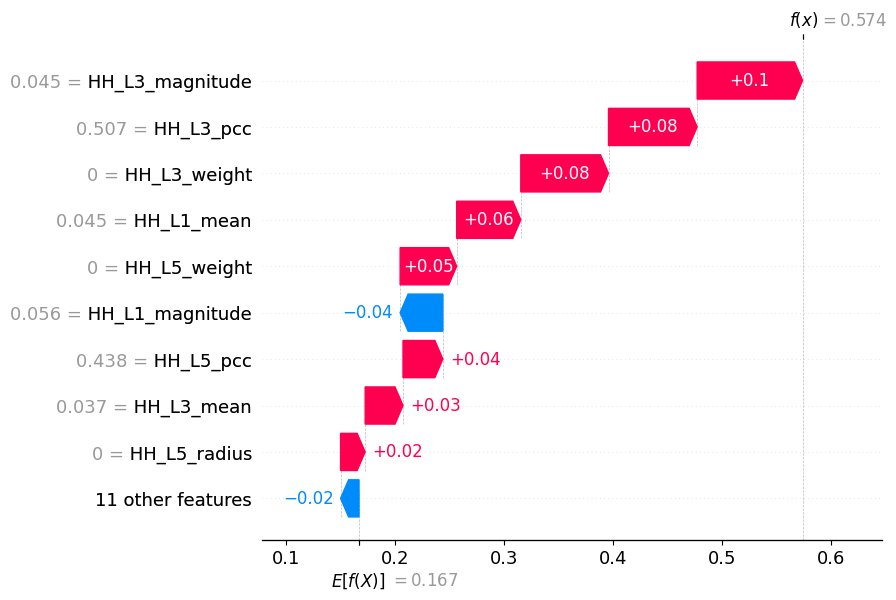

<Figure size 2500x1500 with 0 Axes>

In [42]:
waterfall_explanator(sample)

In [45]:
sample['HH_L3_magnitude'] = 0.060


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [46]:
sample

,HH_L3_covariance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,HH_L3_std,HH_L3_magnitude,HH_L3_radius,HH_L3_pcc,HpHp_L0.01_pcc,HH_L1_weight,HH_L1_mean,HH_L1_std,HH_L1_magnitude,HH_L1_radius
71787,0.550675,0.000099,0.033712,3.582415e-08,0.043439,3.416614e-14,0.648563,0.437621,0.000337,0.036776,0.000011,0.06,7.177427e-10,0.507444,0.331779,0.001014,0.044683,0.002725,0.056207,0.00001


('benign',
 [0.18104261265509444,
  0.12541924666663176,
  0.12402329095524113,
  0.08145294619278723,
  0.06383950926374658,
  0.05993562185624337,
  0.0515267601397396,
  0.048554667423047614,
  0.03827931220875791,
  0.028875430730444653,
  0.028819094929644358,
  0.020370657363065627,
  0.0010817356633082901,
  4.402088933802734e-05,
  2.2340052710218602e-05,
  1.704309715416082e-05,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0003369392627634647,
  9.897050188731153e-05,
  0.043438902934734555,
  0.0027248491721896966,
  0.056207365173159676,
  0.04468337863044956,
  0.033712024107904144,
  0.0010137918219589022,
  0.4376211143102839,
  3.4166136985261424e-14,
  0.06,
  0.5074440693264141,
  0.03677579236419019,
  3.582415397153103e-08,
  7.177427460678973e-10,
  1.0825149268018846e-05,
  0.5506747769757592,
  0.3317793806407229,
  0.6485625059931349,
  1.018180311595528e-05],
 ['HH_L3_weight',
  'HH_L5_weight',
  'HH_L5_magnitude',
  'HH_L1_std',
  'HH_L1_magnitude',
  'HH_L1_mean',
  'HH_L

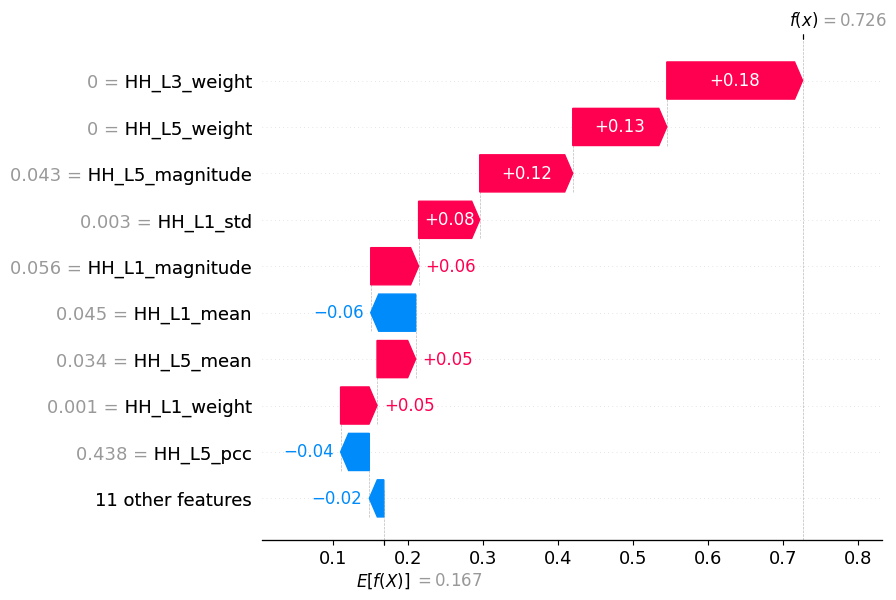

<Figure size 2500x1500 with 0 Axes>

In [49]:
waterfall_explanator(sample)